# Neural Network Implementation

## Building a single layer perceptron <a class="anchor" id="slp"></a>
<img src="https://drive.google.com/uc?id=1cvJa9WfOier2NQIJGHpqDNGn-RlczU1x" width="500px"><br>
A sigle layer perceptron can be thought of as a single learning unit in the network. This node will get inputs from the input layer, perform the learning task along with activation function. <br>
### Some most commonly used activation functions are shown here. <a class="anchor" id="af"></a>

<img src="https://media-exp1.licdn.com/dms/image/C4E12AQFqIFCj71YJPw/article-cover_image-shrink_600_2000/0/1620764635917?e=1658966400&v=beta&t=ssh1slDrSVVP-dxgPWVOuXdgkmc_o2PFZ4RgMUemHT4"></img>

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the number of inputs and outputs
out_nodes = 2
in_nodes = 2

model = Sequential()    # This function allows you to create a sequantial model (a stack) to which you can add as many dense layers as you wish.

# Define a hidden layer with single perceptron.
dense_layer = Dense(out_nodes, activation='sigmoid', kernel_initializer="Ones", bias_initializer="Ones")  # An activation function in a neural network provides non-linearity to the data which is important for learning features from the input data, else the learning will stop at a particular stage and leads to a dying neuron problem.

model.add(dense_layer)

In [2]:
'''
model = Sequential(Dense(out_nodes, activation='sigmoid')) 
'''
#or

'''
model = Sequential() 
model.add(Dense(out_nodes, activation='sigmoid'))
'''

"\nmodel = Sequential() \nmodel.add(Dense(out_nodes, activation='sigmoid'))\n"

#### By now we have created our first single layer perceptron. But the work might not be visible yet.

## Building a multilayer perceptron. <a class="anchor" id="mlp"></a>
MLPs are fully connected with each node connected each node in the other layer. A diagram below gives a taste of what an MLP looks like.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTCL6GN5ikas29zvSQpJPAMXVr2W2QmWWhPrA&usqp=CAU" width="800px"></img>

#### We will build a MLP with 2 hidden dense layers and another dense layer for the output.

In [3]:
import numpy as np

# Generate some random data
train_data = np.random.random((1000, 100))
train_labels = np.random.randint(2, size=(1000, 1))
test_data = np.random.random((100, 100))
test_labels = np.random.randint(2, size=(100, 1))



Now after generating data we will build our Model

In [4]:
units = 32

model = Sequential()

model.add(Dense(units, activation='relu', input_dim=100))       # Input dimension should be equal to the number of features
model.add(Dense(units, activation='relu'))

# The output should be a single outcome so one Dense layer is defined with a single unit.
model.add(Dense(1, activation='sigmoid'))

### Configurations of a model <a class="anchor" id="cm"></a>

**Loss functions** are used to compare the network's predicted output  with the real output, in each pass of the backpropagations algorithm<br>
Common loss functions are: mean-squared error, cross-entropy, and so on...<br><br>
**Metrics** are used to evaluate a model; common metrics are precision, recall, accuracy, auc,..<br>

The **Optimizer** determines the update rules of the weights. 




#### Listed below are different optimizers, loss functions and metrics. For more information, you can always refer to the documentations [here](http://www.tensorflow.org/api_docs/python/tf/keras/optimizers), [here](http://keras.io/losses/) and [here](http://www.tensorflow.org/api_docs/python/tf/metrics)

In [5]:
from tensorflow.keras.optimizers import Adam, SGD, Adadelta, Adagrad, Adamax, Nadam, RMSprop

adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
sgd = SGD(lr=0.001, momentum=0.0, decay=0.0, nesterov=False)
adad = Adadelta(lr=1.0,rho=0.95,epsilon=None,decay=0.0)
adag = Adagrad(lr=0.01)
adamax = Adamax(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0)
nadam = Nadam(lr=0.002,beta_1=0.9,beta_2=0.999,epsilon=None,schedule_decay=0.004)
rms = RMSprop(lr=0.001,rho=0.9,epsilon=None,decay=0.0)

loss = ['sparse_categorical_crossentropy','mean_squared_error','mean_absolute_error',
        'categorical_crossentropy','categorical_hinge']

metrics = ['accuracy','precision','recall']

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adadelta.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adadelta, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adagrad.py:74: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adagrad, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adamax.py:90: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adamax, self).__init__(name, **kwargs)
/usr/local/lib/pyth

In [6]:
# Compile the above created model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])  # Optimises the learning by updating the weights with Stochastic Gradient Descent method.

# Train the model by fitting the train data to the model we compiled in the above line. 
#This is stored in a variable because the output of 'fit' function is a history class which consists of 4 key, 
#value pairs for accuracy, val_accuracy, loss, val_loss
history = model.fit(train_data, train_labels, epochs=30, batch_size=128)
_, train_acc = model.evaluate(train_data, train_labels, verbose=1)
_, test_acc = model.evaluate(test_data, test_labels, verbose=1)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Epoch 1/30
8/8 [==============================] - 1s 4ms/step - loss: 0.7122 - accuracy: 0.5150
Epoch 2/30
8/8 [==============================] - 0s 4ms/step - loss: 0.7040 - accuracy: 0.5180
Epoch 3/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.5230
Epoch 4/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6974 - accuracy: 0.5240
Epoch 5/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.5230
Epoch 6/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6949 - accuracy: 0.5180
Epoch 7/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.5250
Epoch 8/30
8/8 [==============================] - 0s 5ms/step - loss: 0.6939 - accuracy: 0.5240
Epoch 9/30
8/8 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5250
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5260
Epoch 11/30
8/8 [======================

### Now  we have created our first mutiple layer deep neural network which is actually learning from the data and giving you results.

# Managing Model Overfitting! <a class="anchor" id="mmo"></a>

Now that we have trained our very first model, it's time to optimise the model training dealing with the problem of overfitting. 

Overfitting could be handled in many ways. Some most common ways we will see here include:
* Weight Regularization
* Dropout
* Early Stopping or Callbacks

### Dropout <a class="anchor" id="drop"></a>

Dropout is another most commonly used regularization techniques for neural networks.<br>
Dropout, applied as a hidden layer, randomly drops out a number of output features of the layer during training.<br>
<img src="https://drive.google.com/uc?id=1PcGnn9cdM5JQk2nxRHAFPZAtBj1fNMvk" width="600px"><br>

The "dropout rate" is the fraction of the features that are being dropped; it is usually set between 0.2 and 0.5.

At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

### Early Stopping <a class="anchor" id="es"></a>

The training could be stopped at an epoch where there isn't any improvement of accuracy or loss for a specific number of rounds. These specific number of rounds is called 'patience'. Even if we declare a total of 1,000 epochs, the training will stop according to the patience once it finds no improvement in the accuracy.<br>

<img src="https://drive.google.com/uc?id=1prBt0w2oWIviRDjOSRKP2TglDGUr-EGZ" width="400px"><br><br>


 # MNIST dataset


  MNIST is a collection of handwritten digits ranging from the number 0 to 9.

  It has a training set of 60,000 images, and 10,000 test images that are classified into corresponding categories or labels.

  To use the MNIST dataset in Keras, an API is provided to download and extract images and labels automatically.

  The following Keras code shows how to access MNIST dataset, plot 25 random samples, and count the number of labels for train and test datasets.



In [7]:
import numpy as np 
import pandas as pd 


import matplotlib.pyplot as plt 


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout , Flatten
from keras.callbacks import ModelCheckpoint


In [8]:
# import dataset
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()




In [9]:
#defining encoder
def encode_digit(x):
	l=[0 for i in range(10)]
	l[x]=1
	return l 

In [10]:
for i in range(10):
  print(encode_digit(i))


[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [11]:
# resize and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [13]:
x_test.shape

(10000, 28, 28, 1)

In [14]:
y_train = np.array([encode_digit(i) for i in y_train])
y_test = np.array([encode_digit(i) for i in y_test])


In [15]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256,input_shape=(28,28,1), activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(256, activation='relu'))

model.add(Dropout(0.4))

model.add(Dense(10, activation='softmax'))

filepath = "best_weight.h5"
checkpoint=ModelCheckpoint(filepath , monitor = 'val_accuracy' ,save_best_only=True , mode = 'max')



In [16]:
'''
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
'''

"\nmodel.compile(loss='categorical_crossentropy', \n              optimizer='adam',\n              metrics=['accuracy'])\n"

In [17]:

model.compile(loss='mean_squared_error', 
              optimizer='SGD',
              metrics=['accuracy'])
         

In [18]:
history=model.fit(x_train, y_train, epochs=5, batch_size=128 ,validation_data=(x_test,y_test),verbose=1 , callbacks = [checkpoint])


Epoch 1/5
469/469 [==============================] - 9s 16ms/step - loss: 0.0915 - accuracy: 0.1136 - val_loss: 0.0894 - val_accuracy: 0.1678
Epoch 2/5
469/469 [==============================] - 6s 14ms/step - loss: 0.0904 - accuracy: 0.1363 - val_loss: 0.0883 - val_accuracy: 0.2612
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0893 - accuracy: 0.1643 - val_loss: 0.0872 - val_accuracy: 0.3359
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0883 - accuracy: 0.1965 - val_loss: 0.0861 - val_accuracy: 0.3832
Epoch 5/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0872 - accuracy: 0.2270 - val_loss: 0.0847 - val_accuracy: 0.4159


In [19]:

loss, acc = model.evaluate(x_test, y_test, batch_size=128)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 4ms/step - loss: 0.0847 - accuracy: 0.4159

Test accuracy: 41.6%


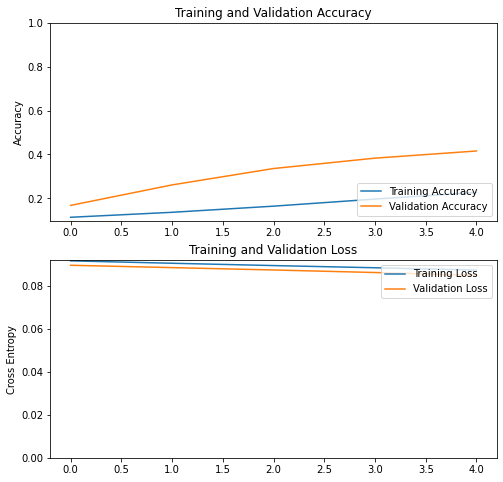

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# ________________ Graph 1 -------------------------

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

# ________________ Graph 2 -------------------------

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.title('Training and Validation Loss')
plt.show()